In [3]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, joblib
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [ ]:
path = r"C:\Users\Davi\Documents\Projetos\FIAP\FASE 6\Enterprise Challenge Fase 4\docs\estrutura de teste\Dados_simulados.xlsx"
df = pd.read_excel(path)
df[['vl_temperatura', 'vl_corrente']] = df[['vl_temperatura', 'vl_corrente']].round(2)
df['vl_vibracao'] = df['vl_vibracao'].astype(int)
display(df)

,id_registro,id_sensor,id_maquina,id_lote,timestamp_registro,vl_temperatura,vl_vibracao,vl_corrente
0,1,2,2,5,2025-08-01 03:00:00.000,82.62,6,153.09
1,2,4,2,4,2025-08-01 03:16:35.297,68.89,0,140.84
2,3,7,1,5,2025-08-01 03:33:10.594,53.12,4,156.09
3,4,11,4,1,2025-08-01 03:49:45.891,81.06,4,144.78
4,5,10,3,4,2025-08-01 04:06:21.188,115.44,3,143.18
...,...,...,...,...,...,...,...,...
4995,4996,6,4,3,2025-09-27 15:58:29.123,85.19,4,141.06
4996,4997,9,5,4,2025-09-27 16:15:04.420,44.80,4,140.47
4997,4998,11,2,1,2025-09-27 16:31:39.718,100.97,0,144.81
4998,4999,3,5,4,2025-09-27 16:48:15.015,64.58,3,153.88


In [14]:
def classificar_risco_temp(temperatura):
    if temperatura < 85:
        return 'Normal'
    elif 85 <= temperatura < 95:
        return 'Atencao'
    else:
        return 'Risco Iminente'

def classificar_risco_corrente(corrente):
    if corrente <= 152:
        return 'Normal'
    elif corrente < 155:
        return 'Atencao'
    else:
        return 'Risco Iminente'

def classificar_risco_vibracao(vibracao):
    if vibracao <= 6:
        return 'Normal'
    elif vibracao < 9:
        return 'Atencao'
    else:
        return 'Risco Iminente'

In [15]:
df_temperatura = df.copy()
df_temperatura['risco'] = df_temperatura['vl_temperatura'].apply(classificar_risco_temp)
display(df_temperatura)

,id_registro,id_sensor,id_maquina,id_lote,timestamp_registro,vl_temperatura,vl_vibracao,vl_corrente,risco
0,1,2,2,5,2025-08-01 03:00:00.000,82.62,6,153.09,Normal
1,2,4,2,4,2025-08-01 03:16:35.297,68.89,0,140.84,Normal
2,3,7,1,5,2025-08-01 03:33:10.594,53.12,4,156.09,Normal
3,4,11,4,1,2025-08-01 03:49:45.891,81.06,4,144.78,Normal
4,5,10,3,4,2025-08-01 04:06:21.188,115.44,3,143.18,Risco Iminente
...,...,...,...,...,...,...,...,...,...
4995,4996,6,4,3,2025-09-27 15:58:29.123,85.19,4,141.06,Atencao
4996,4997,9,5,4,2025-09-27 16:15:04.420,44.80,4,140.47,Normal
4997,4998,11,2,1,2025-09-27 16:31:39.718,100.97,0,144.81,Risco Iminente
4998,4999,3,5,4,2025-09-27 16:48:15.015,64.58,3,153.88,Normal


In [ ]:
df_corrente = df.copy()
df_corrente['risco'] = df_corrente['vl_corrente'].apply(classificar_risco_corrente)
display(df_corrente)

In [ ]:
df_vibracao = df.copy()
df_vibracao['risco'] = df_vibracao['vl_vibracao'].apply(classificar_risco_vibracao)
display(df_vibracao)

      vl_temperatura
661            61.24
2578           67.45
3325          121.58
174            94.25
4931           80.66
...              ...
3784           73.69
2097           84.34
1197           49.99
4796          102.72
122            81.49

[3500 rows x 1 columns]
Acurácia do Modelo: 100.00%

Gráfico da Matriz de Confusão salvo como 'matriz_confusao.png'


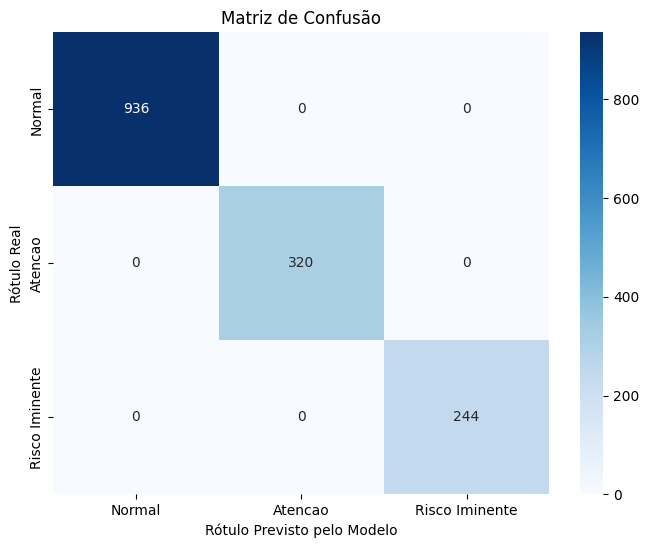

TypeError: dump() missing 1 required positional argument: 'filename'

In [ ]:
## SEPARAÇÃO DADOS DE TREINO E TESTE
x_train, x_test, y_train, y_test = train_test_split(df_temperatura[['vl_temperatura']], df_temperatura['risco'], random_state=42, test_size=0.3, stratify=df_temperatura['risco'])

## Treinamento do modelo
modelo = RandomForestClassifier(random_state=42)
modelo.fit(x_train, y_train)

## Predict
pred = modelo.predict(x_test)

## Teste de Acuracia
accuracy = accuracy_score(y_test, pred)
print(f"Acurácia do Modelo: {accuracy * 100:.2f}%")

# Gerar a Matriz de Confusão
cm = confusion_matrix(y_test, pred, labels=['Normal', 'Atencao', 'Risco Iminente'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Atencao', 'Risco Iminente'], 
            yticklabels=['Normal', 'Atencao', 'Risco Iminente'])
plt.xlabel('Rótulo Previsto pelo Modelo')
plt.ylabel('Rótulo Real')
plt.title('Matriz de Confusão')

# Salva a imagem da matriz de confusão em um arquivo
# plt.savefig('matriz_confusao.png')
print("\nGráfico da Matriz de Confusão salvo como 'matriz_confusao.png'")
plt.show()

joblib.dump('RFC_Temp.joblib')

In [ ]:
## SEPARAÇÃO DADOS DE TREINO E TESTE
x_train, x_test, y_train, y_test = train_test_split(df_corrente[['vl_corrente']], df_corrente['risco'], random_state=42, test_size=0.3, stratify=df_corrente['risco'])

## Treinamento do modelo
modelo = RandomForestClassifier(random_state=42)
modelo.fit(x_train, y_train)

## Predict
pred = modelo.predict(x_test)

## Teste de Acuracia
accuracy = accuracy_score(y_test, pred)
print(f"Acurácia do Modelo: {accuracy * 100:.2f}%")

# Gerar a Matriz de Confusão
cm = confusion_matrix(y_test, pred, labels=['Normal', 'Atencao', 'Risco Iminente'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Atencao', 'Risco Iminente'], 
            yticklabels=['Normal', 'Atencao', 'Risco Iminente'])
plt.xlabel('Rótulo Previsto pelo Modelo')
plt.ylabel('Rótulo Real')
plt.title('Matriz de Confusão')

# Salva a imagem da matriz de confusão em um arquivo
# plt.savefig('matriz_confusao.png')
print("\nGráfico da Matriz de Confusão salvo como 'matriz_confusao.png'")
plt.show()

joblib.dump(modelo, 'RFC_Corrt.joblib')